<a href="https://colab.research.google.com/github/Walmartjr008/Prediction-for-Warehouse-stocking/blob/main/ARIMA_MODEL_FOR_OFFICE_SUPPLIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [14]:
import pandas as pd
df = pd.read_excel('/content/walmart (2).xls')
Office= df.loc[df['Category'] == 'Office Supplies']

In [15]:
Office['Order Date'].min(), Office['Order Date'].max()


(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [16]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
Office.drop(cols, axis=1, inplace=True)
Office = Office.sort_values('Order Date')
Office.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [17]:
Office= Office.groupby('Order Date')['Sales'].sum().reset_index()

In [18]:
Office = Office.set_index('Order Date')
Office.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [19]:
y = Office['Sales'].resample('MS').mean()

In [20]:
y['2017':]

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

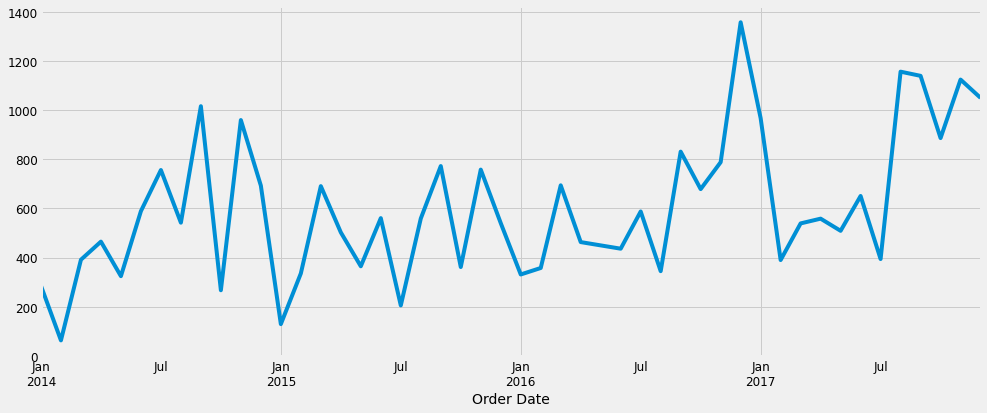

In [21]:
import matplotlib.pyplot as plt
y.plot(figsize=(15, 6))
plt.show()


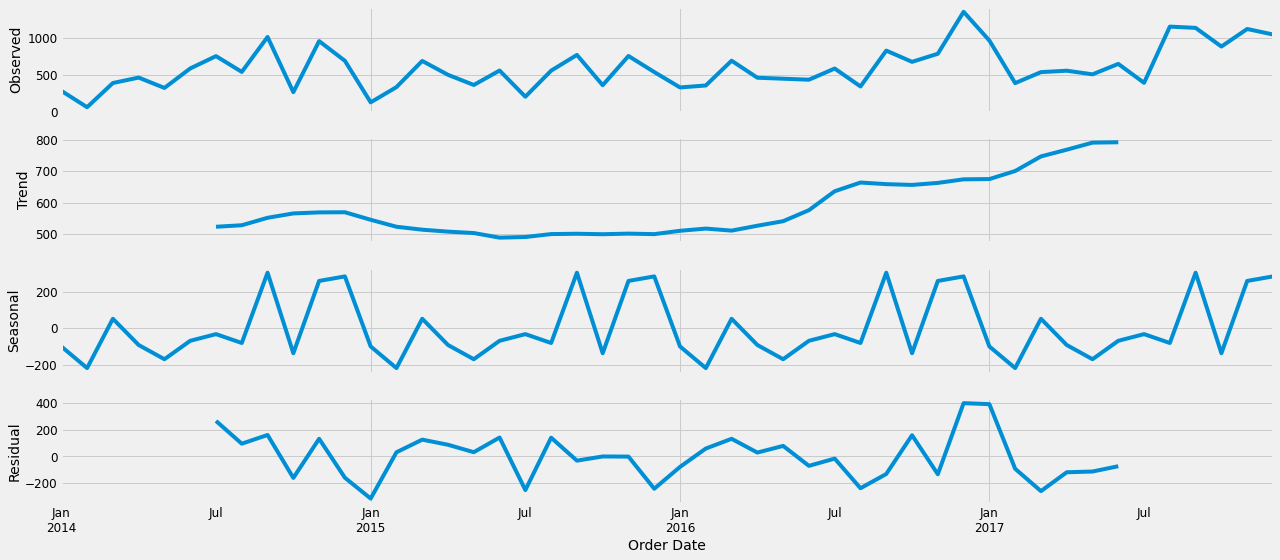

In [22]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [23]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))      
        except:    
          continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:747.1990404227043
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1173.644185540617
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.7335398750499
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.0876543936834
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1490.6997701051214
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.6891395292498
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.7601415814778
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:517.4952646587096
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2530.548013043983
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.6922094460116
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:666.4572045007284
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1195.4652864010623
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:503.0840747609876
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:500.0109385290892
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1346.9154142846644
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:335.7148959418817
ARIMA(0, 1, 1)x(0, 0

In [25]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1720      0.229      0.750      0.453      -0.278       0.622
ma.L1         -1.1313      0.243     -4.646      0.000      -1.608      -0.654
ar.S.L12      -0.5448      0.238     -2.292      0.022      -1.011      -0.079
sigma2      5.009e+04   2.52e+04      1.989      0.047     722.112    9.95e+04


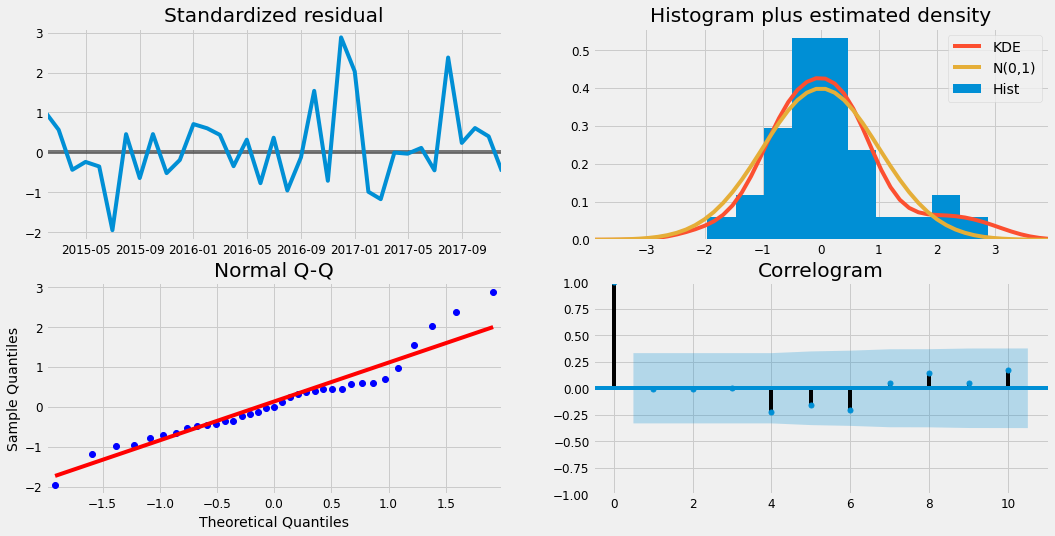

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

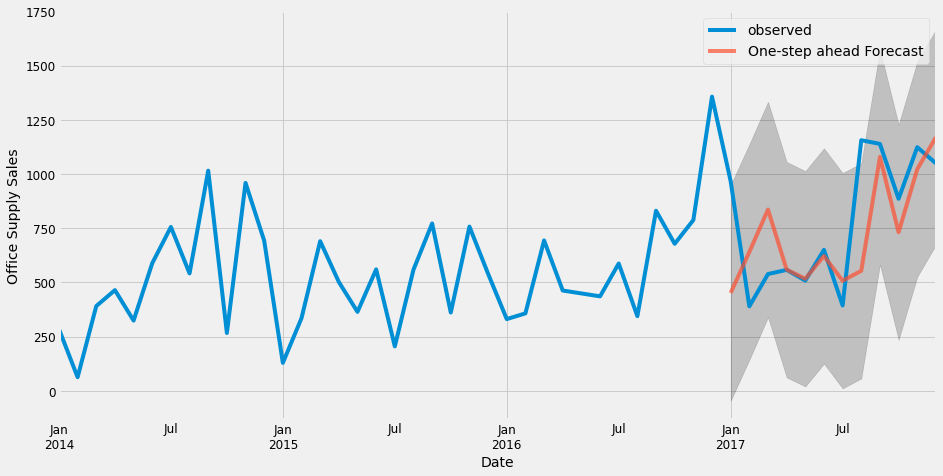

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supply Sales')
plt.legend()
plt.show()

In [38]:
import numpy as np
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 70427.02
The Root Mean Squared Error of our forecasts is 265.38


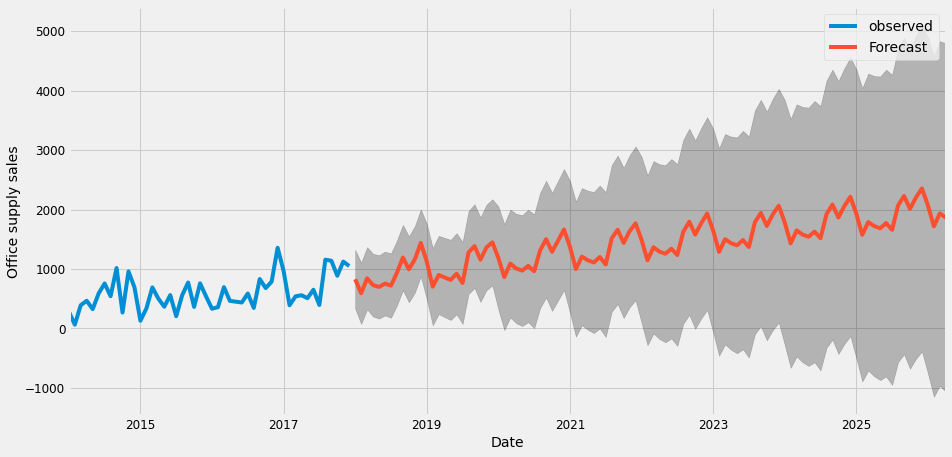

In [39]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office supply sales')
plt.legend()
plt.show()

In [40]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [41]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()


,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


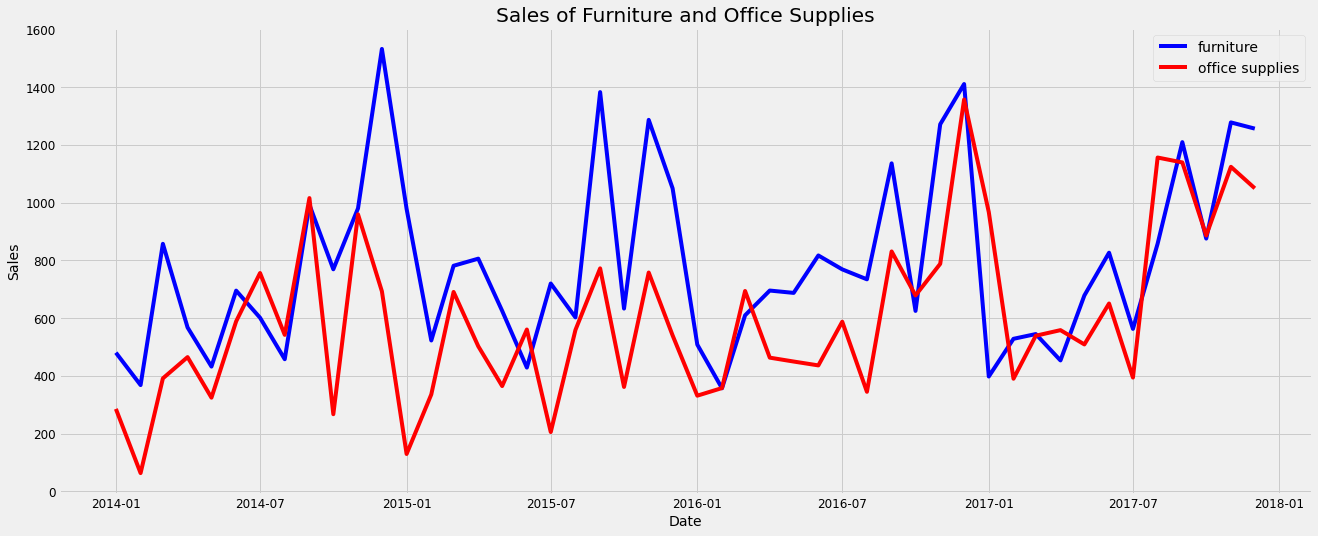

In [42]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

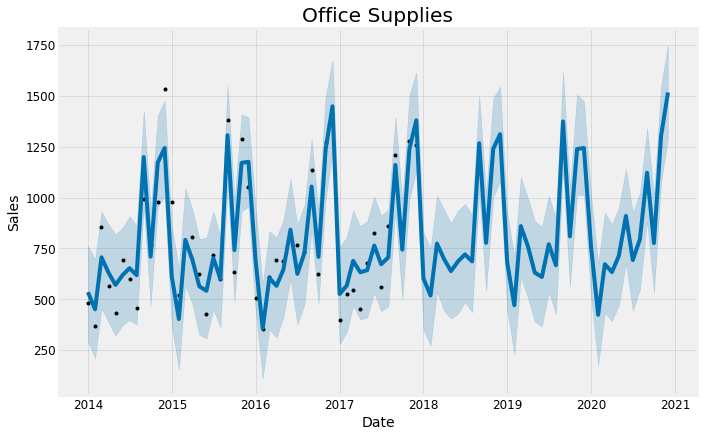

In [45]:
from fbprophet import Prophet
weekly_seasonality=True
daily_seasonality=True
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies');

In [ ]:
print(y_forecasted)

Order Date
2017-01-01     452.009333
2017-02-01     640.407354
2017-03-01     836.316664
2017-04-01     559.401787
2017-05-01     517.129710
2017-06-01     622.196697
2017-07-01     508.004936
2017-08-01     554.019947
2017-09-01    1078.967339
2017-10-01     731.765958
2017-11-01    1022.462354
2017-12-01    1169.936125
Freq: MS, dtype: float64
